In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Machine learning\Data sets')
os.listdir()

['bestsellers with categories.csv',
 'bjh.txt',
 'creditcard 02.xlsx',
 'creditcard.csv',
 'Final_data.xlsx',
 'hcxbhc.txt',
 'Life Expectancy Data.csv',
 'MarksData.xlsx',
 'softskills.txt',
 'winequality-red.csv',
 'Youtube.txt']

In [55]:
df = pd.read_csv('bestsellers with categories.csv')
data.head()

,Name,Author,User_rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
data.shape

(550, 7)

In [6]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
# Rename columns with proper name
data.rename({'User Rating': 'User_rating'}, axis=1, inplace=True)

In [9]:
data.columns

Index(['Name', 'Author', 'User_rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [10]:
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['Name', 'Author', 'Genre'], dtype='object')

In [17]:
for i in cat_feat.columns:
    print(i, '\n', 'Number of unique values =',data[i].nunique())

Name 
 Number of unique values = 351
Author 
 Number of unique values = 248
Genre 
 Number of unique values = 2


In [30]:
for i in cat_feat.columns:
    print(f'{i}\nNumber of unique values are {data[i].nunique()}')

Name
Number of unique values are 351
Author
Number of unique values are 248
Genre
Number of unique values are 2


In [31]:
for i in cat_feat.columns:
    print(f'{i}\nValue counts : \n{data[i].value_counts()}\n')

Name
Value counts : 
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

Author
Value counts : 
Jeff

In [32]:
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['User_rating', 'Reviews', 'Price', 'Year'], dtype='object')

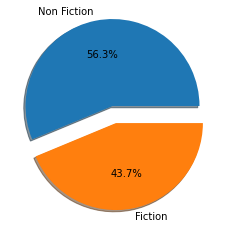

In [83]:
y = np.array([310, 241])
mylabels = ["Non Fiction", "Fiction"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.show() 

In [49]:
data.duplicated().sum()

0

In [50]:
data.isnull().sum()

Name           0
Author         0
User_rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
for i, year in enumerate(y1):
    counts = data[data['Year'] == year]['Genre'].value_counts()
    print(counts)

Non Fiction    26
Fiction        24
Name: Genre, dtype: int64
Non Fiction    30
Fiction        20
Name: Genre, dtype: int64
Non Fiction    29
Fiction        21
Name: Genre, dtype: int64
Non Fiction    29
Fiction        21
Name: Genre, dtype: int64
Non Fiction    26
Fiction        24
Name: Genre, dtype: int64


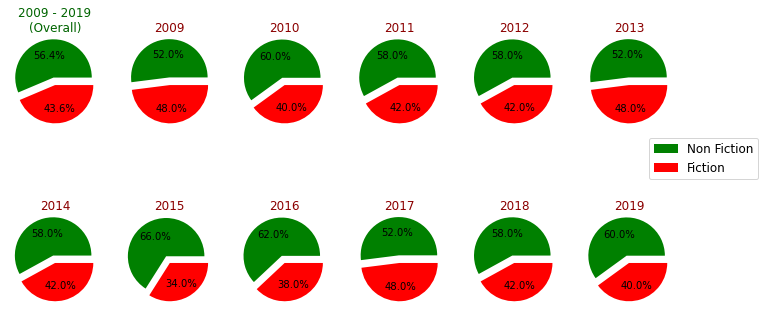

In [82]:
Genre_col = ['Green','Red']
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
Genre_count = data['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=Genre_count.values, colors=Genre_col, autopct='%1.1f%%', explode = myexplode)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen')

for i, year in enumerate(y1):
    counts = data[data['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred')
    ax[0,i+1].pie(x=counts.values,colors=Genre_col, autopct='%1.1f%%', explode = myexplode)

for i, year in enumerate(y2):
    counts = data[data['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, colors=Genre_col, autopct='%1.1f%%', explode = myexplode)
    ax[1,i].set_title(year, color='darkred')

fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

In [97]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:10]
best_nf_authors

Author
Gary Chapman                          11.0
American Psychological Association    10.0
Gallup                                 9.0
Rob Elliott                            8.0
Stephen R. Covey                       7.0
Bill O'Reilly                          7.0
Don Miguel Ruiz                        6.0
Sarah Young                            6.0
The College Board                      6.0
Roger Priddy                           5.0
Name: (Name, Non Fiction), dtype: float64

In [98]:
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:10]
best_f_authors

Author
Jeff Kinney        12.0
Suzanne Collins    11.0
Rick Riordan       11.0
Dr. Seuss           9.0
Stephenie Meyer     7.0
Dav Pilkey          7.0
Eric Carle          7.0
J.K. Rowling        6.0
E L James           6.0
Stieg Larsson       6.0
Name: (Name, Fiction), dtype: float64

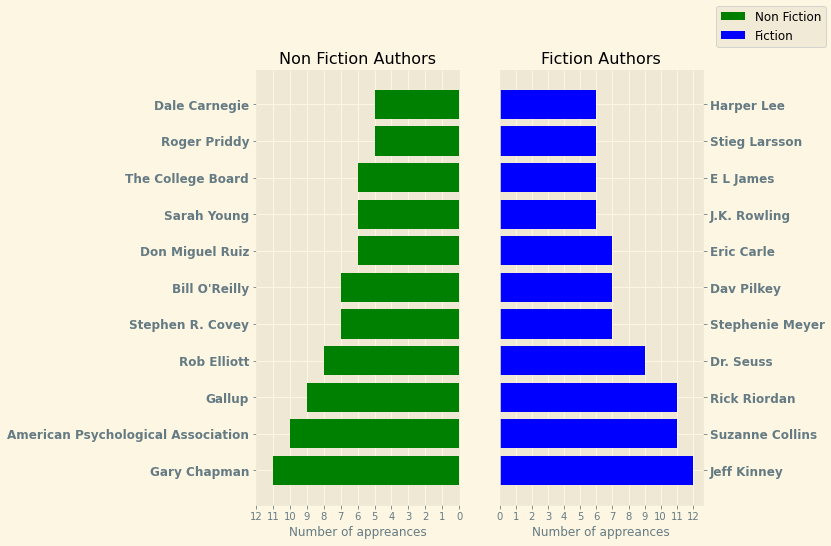

In [99]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

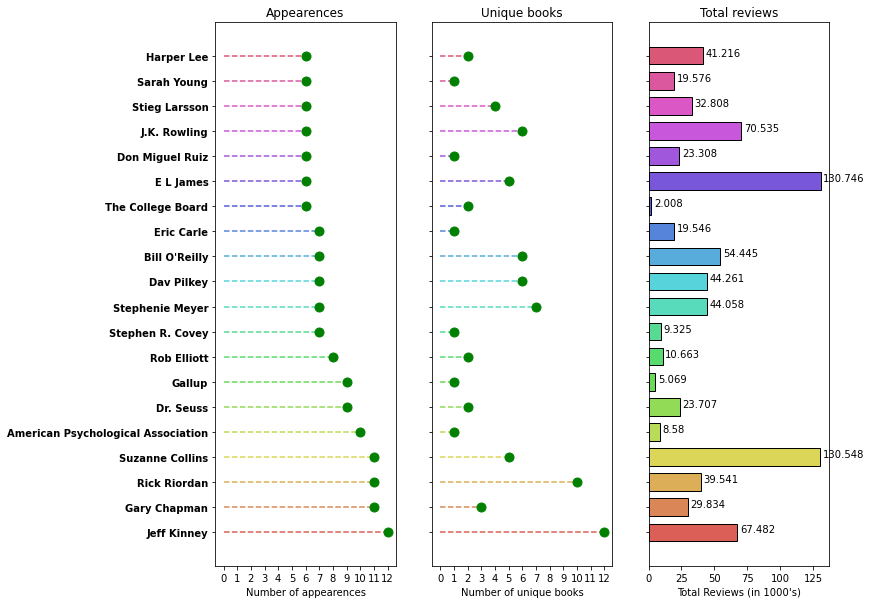

In [103]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()